# Linear regression model - OLS


[Machine Learning Interpretability Course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will compare the linear regression (OLS) implementations of `scikit-learn` and `statsmodels`.

We will evaluate:

- model coefficients 
- R2 
- F-ratio
- p-value of the model
- residuals

These are the first steps towards understanding if the model shows a good fit to the data. 

Only when the model shows a good fit can we derive meaningful interpretations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


### Visualize data

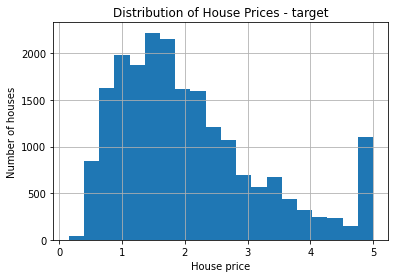

In [3]:
# Display the target distribution

y.hist(bins=20)
plt.xlabel("House price")
plt.ylabel("Number of houses")
plt.title("Distribution of House Prices - target")
plt.show()

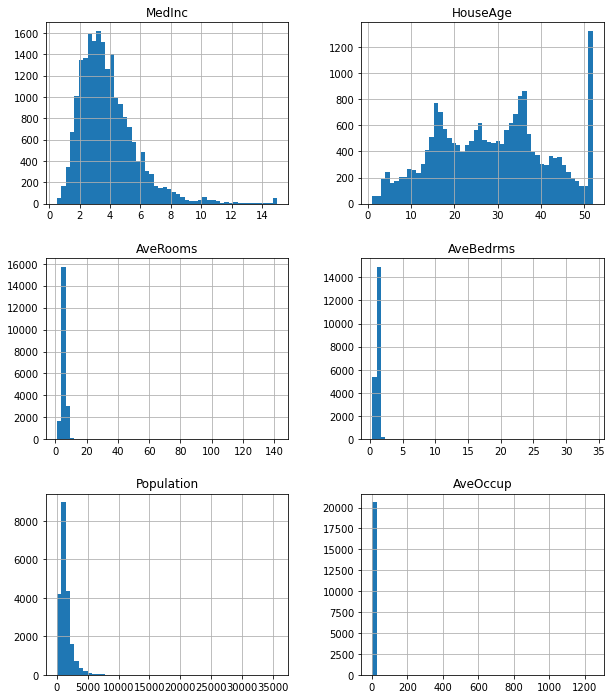

In [4]:
# Display the variables distribution

X.hist(bins=50, figsize=(10, 12))
plt.show()

### Split data

In [5]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

### Scale data

In [6]:
scaler = MinMaxScaler().set_output(transform="pandas").fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Scikit-learn

In [7]:
# fit model

linreg = LinearRegression().fit(X_train, y_train)

In [8]:
# R2 in train set

linreg.score(X_train, y_train)

0.5500622254048072

In [9]:
# R2 in test set

linreg.score(X_test, y_test)

0.5105637256518258

The model explains about 50% of the variability in the target variable.

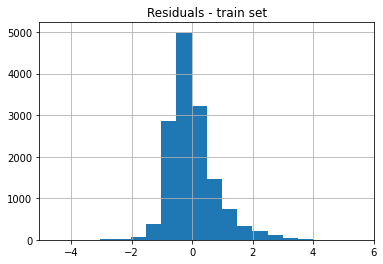

In [10]:
# plot residuals - train set

residuals = y_train - linreg.predict(X_train)

residuals.hist(bins=20)
plt.title("Residuals - train set")
plt.show()

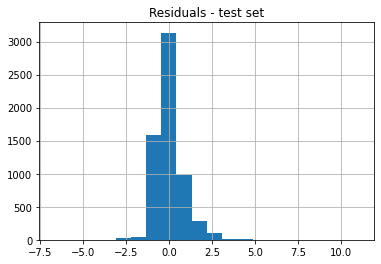

In [11]:
# plot residuals - test set

residuals = y_test - linreg.predict(X_test)

residuals.hist(bins=20)
plt.title("Residuals - test set")
plt.show()

The residuals are fairly normally distributed and centered at 0.

In [12]:
# coefficients

pd.Series(linreg.coef_, index=linreg.feature_names_in_)

MedInc         7.990024
HouseAge       0.808127
AveRooms     -30.678295
AveBedrms     33.996598
Population     0.527330
AveOccup      -3.281687
dtype: float64

### Evaluate the model

We need to calculate all of these statistics manually. 

In [13]:
# SST - total sum of squares

SST = np.sum((y_train - y_train.mean())**2)

SST

19227.7912639894

In [14]:
# SSR - sum of squares of the residuals

SSR = np.sum((y_train - linreg.predict(X_train))**2)

SSR

8651.309611700279

In [15]:
# SSM - sum of squares of the model

SSM = SST - SSR

SSM

10576.48165228912

In [16]:
# R2 - fraction of variability explained by the model

SSM / SST

0.5500622254048072

In [17]:
# mean sum of squares of the model

df1 = len(X_train.columns)

MSM = SSM / df1

MSM

1762.7469420481866

In [18]:
# mean sum of squares of the residuals

df2 = (len(X_train)-len(X_train.columns))

MSR = SSR / df2

MSR

0.5990381949660905

In [19]:
# F-ratio

F = MSM/MSR

F

2942.628628459943

In [20]:
p_value = 1 - stats.f.cdf(F, df1, df2)

p_value

1.1102230246251565e-16

## Stats models

In [21]:
# Our model needs an intercept so we add a column of 1s:

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [22]:
# Fit model

linreg = sm.OLS(y_train, X_train)
results = linreg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2942.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:45:43   Log-Likelihood:                -16796.
No. Observations:               14448   AIC:                         3.361e+04
Df Residuals:                   14441   BIC:                         3.366e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0659      0.028      2.340      0.0

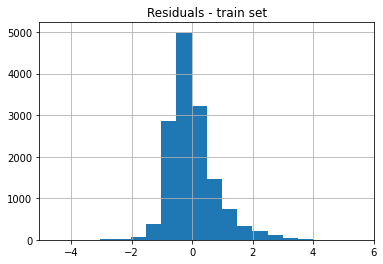

In [23]:
# plot residuals - train set

residuals = y_train - results.get_prediction().summary_frame()["mean"]

residuals.hist(bins=20)
plt.title("Residuals - train set")
plt.show()

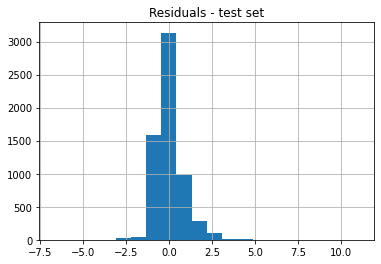

In [24]:
# plot residuals - test set

residuals = y_test - results.get_prediction(X_test).summary_frame()["mean"]

residuals.hist(bins=20)
plt.title("Residuals - test set")
plt.show()

We have a decent linear model. How do we make global and local interpretations?